# EDA

In [1]:
# jupyter lab에서 자동완성이 않될때 사용하는 코드
%config Completer.use_jedi = False

In [53]:
# jupyter notebook에서 array 전부 출력하게 하는 방법
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)

In [3]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

In [4]:
LEFT_KNEE_PATH = './data/left_knee/'

In [5]:
left_knee_data_lst = os.listdir(LEFT_KNEE_PATH)

### count

In [6]:
left_knee_lst, left_knee_mask_lst = [], []
for data in left_knee_data_lst:
    if 'mask' in data:
        left_knee_mask_lst.append(data)
    else:
        left_knee_lst.append(data)

left_knee_lst.sort()
left_knee_mask_lst.sort()
        
print(len(left_knee_lst), len(left_knee_mask_lst))

315 315


### size Check

In [7]:
n = len(left_knee_lst)
data = []
for i in tqdm(range(n)):
    img = cv2.imread(LEFT_KNEE_PATH + left_knee_lst[i])
    c, r, _ = img.shape
    data.append([c, r])

df = pd.DataFrame(data, columns=['Col', 'Row'])
df.shape

100%|██████████| 315/315 [00:00<00:00, 432.85it/s]


(315, 2)

In [8]:
print(df['Col'].mean(), df['Row'].mean())
print(df['Col'].max(), df['Row'].max())
print(df['Col'].min(), df['Row'].min())

220.96825396825398 241.4031746031746
370 370
140 164


In [9]:
(df['Row'] - df['Col']).max()

73

<AxesSubplot:>

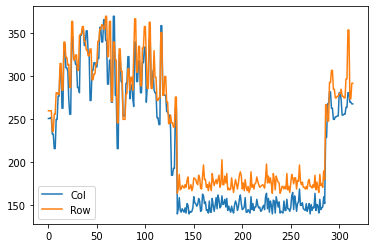

In [10]:
df.plot.line()

In [11]:
df.iloc[310]

Col    281
Row    354
Name: 310, dtype: int64

In [12]:
def show_image(idx):
    img_path = LEFT_KNEE_PATH + left_knee_lst[idx]

    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    plt.subplot(121)
    plt.title('cv2.IMREAD_COLOR')
    plt.imshow(img)

    plt.subplot(122)
    plt.title('cv2.IMREAD_GRAYSCALE')
    plt.imshow(img_gray)

    plt.show()

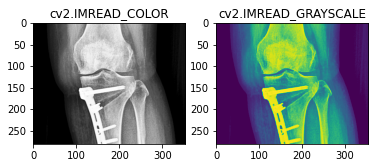

In [13]:
show_image(310)

### cv2 흑뱃 or 컬러 ?!

In [14]:
idx = 0
img_path = LEFT_KNEE_PATH + left_knee_lst[idx]

img = cv2.imread(img_path, cv2.IMREAD_COLOR)
img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

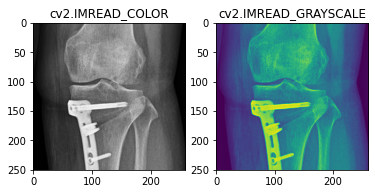

((251, 260, 3), (251, 260))

In [15]:
plt.subplot(121)
plt.title('cv2.IMREAD_COLOR')
plt.imshow(img)

plt.subplot(122)
plt.title('cv2.IMREAD_GRAYSCALE')
plt.imshow(img_gray)

plt.show()

img.shape, img_gray.shape

### 이미지와 마스크 같이 보기

In [16]:
idx = 0
img_path = LEFT_KNEE_PATH + left_knee_lst[idx]
mask_path = LEFT_KNEE_PATH + left_knee_mask_lst[idx]

print(img_path, mask_path)

./data/left_knee/104.png ./data/left_knee/1041_mask.png


In [17]:
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
mask = cv2.imread(mask_path, cv2.IMREAD_COLOR)

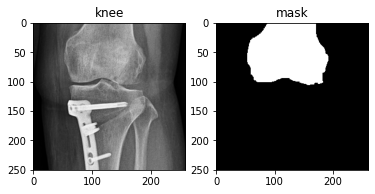

In [18]:
plt.subplot(121)
plt.title('knee')
plt.imshow(img)

plt.subplot(122)
plt.title('mask')
plt.imshow(mask)

plt.show()

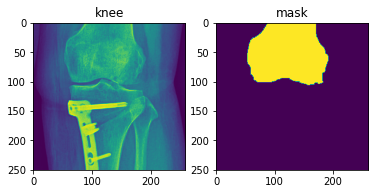

In [19]:
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

plt.subplot(121)
plt.title('knee')
plt.imshow(img)

plt.subplot(122)
plt.title('mask')
plt.imshow(mask)

plt.show()

In [20]:
img_path = LEFT_KNEE_PATH + left_knee_data_lst[0]
img_path

'./data/left_knee/104.png'

In [21]:
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

img.shape

(251, 260)

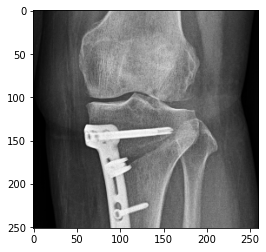

In [22]:
plt.imshow(img/255.0, cmap='gray')

In [23]:
(img/255.0).mean()

0.37454039047430193

In [24]:
(img/255.0).std()

0.2228006094043761

In [25]:
from PIL import Image
 
im = Image.open(img_path)
im.size

(260, 251)

In [26]:
import numpy as np

(np.array(im)/255.0).mean()

0.3745403904743019

In [27]:
(np.array(im)/255.0).std()

0.2228006094043761

In [28]:
np.asarray(im).shape

(251, 260, 3)

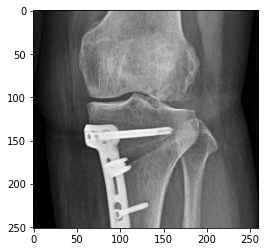

In [29]:
plt.imshow(im)

## cv2 vs PIL

- cv2와 PIL로 각각 이미지 불러와보기
    
    - 행, 렬 만 변경되는것 같다
    
    
- 흑백 영사과 이진 영상 ?!!

In [30]:
path = './data/train_knee/'
knee_data_lst = os.listdir(path)

knee_data_lst.sort()

img_path = path + knee_data_lst[1]
mask_path = path + knee_data_lst[2]

img_path, mask_path

('./data/train_knee/lf_1041.png', './data/train_knee/lf_1041_mask.png')

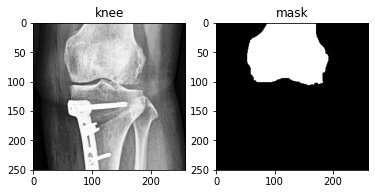

((251, 260), (251, 260))

In [31]:
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

plt.subplot(121)
plt.title('knee')
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.title('mask')
plt.imshow(mask, cmap='gray')

plt.show()

img.shape, mask.shape

In [32]:
img = img / 255.
mask = mask / 255.

print(f"img | mean: {img.mean()}, std: {img.std()}")
print(f"mask | mean: {mask.mean()}, std: {mask.std()}")

img | mean: 0.4924150156538251, std: 0.2938418558775874
mask | mean: 0.1810910205332516, std: 0.3850935766998419


### 이진영상(Binary Image)

`.convert('1')`

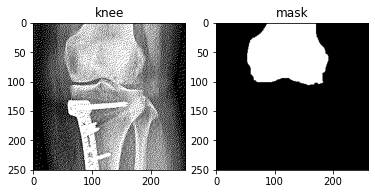

((260, 251), (260, 251))

In [33]:
from PIL import Image

img = Image.open(img_path).convert('1')
mask = Image.open(mask_path).convert('1')

plt.subplot(121)
plt.title('knee')
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.title('mask')
plt.imshow(mask, cmap='gray')

plt.show()

img.size, mask.size

In [34]:
# to array
img = np.asarray(img)
mask = np.asarray(mask)

img.shape, mask.shape

((251, 260), (251, 260))

In [35]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [36]:
mask.max(), mask.min(), mask.mean(), mask.std()

(True, False, 0.1810910205332516, 0.3850935766998419)

In [37]:
mask = mask.astype(float)

In [38]:
mask.max(), mask.min(), mask.mean(), mask.std()

(1.0, 0.0, 0.1810910205332516, 0.3850935766998419)

In [39]:
img = img / 255.
# mask = mask / 255.

print(f"img | mean: {img.mean()}, std: {img.std()}")
print(f"mask | mean: {mask.mean()}, std: {mask.std()}")

img | mean: 0.0019279142855425956, std: 0.001960508782484587
mask | mean: 0.1810910205332516, std: 0.3850935766998419


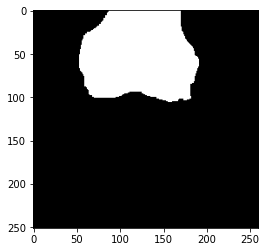

In [40]:
plt.imshow(mask, cmap='gray')

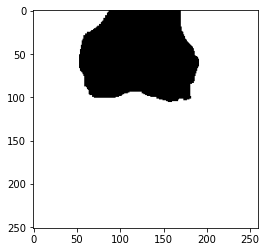

In [41]:
plt.imshow(mask, cmap=plt.cm.binary)

In [43]:
# plt.imshow(np.invert(mask), cmap=plt.cm.binary)

In [45]:
# np.invert(mask)[0][0]

In [46]:
img_path, mask_path

('./data/train_knee/lf_1041.png', './data/train_knee/lf_1041_mask.png')

In [47]:
img = Image.open(img_path).convert('L')
mask = Image.open(mask_path).convert('1')

img_resized = img.resize((512, 512))
mask_resized = mask.resize((512, 512))

# to array
img_arr = np.asarray(img_resized, np.float32)
mask_arr = np.asarray(mask_resized)

img_arr = img_arr / 255.0

In [50]:
mask_arr = mask_arr.astype(float)

In [55]:
# mask_arr

In [52]:
mask_arr.max(), mask_arr.min(), mask_arr.mean(), mask_arr.std()

(1.0, 0.0, 0.18117141723632812, 0.385160141776)

In [63]:
mask = Image.open(mask_path)

mask.size

(260, 251)

In [62]:
# np.array(mask)/255.

In [74]:
img = Image.open(img_path).convert('1')
img.size

(260, 251)

In [75]:
(np.array(img, 'float32') / 255.).shape

(251, 260)

In [77]:
np.array(img).shape

(251, 260)

In [80]:
# np.array(img)